# Paper Code Overview

## Installation 

Cloned with "`git clone https://github.com/MuhammedHasan/metabolitics.git`"

Install python3 and pip3 

Download dependencies with "`pip install -r requirements.txt`" with pip3

This notebook is avaliable at "`src/notebooks/paper_overview.ipynb`"

Run notebook with "`jupyter notebook`" and run all cells results of paper will be reproduced

Note: Some computation step precomputed and loaded due to reduce expensive computation steps but there are still some steps may require relatively high memory and computation power.

## Data Preprocessing

Imports and basic configurations

In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2g}'.format)

Loading pre-computed reaction fluxes since this is expensive computation 

In [3]:
from services import DataReader

X, y = DataReader().read_analyze_solution('bc_averaging_disease_analysis#k=0')

In [4]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff'])

df_supp = pd.DataFrame(pre.fit_transform(X, y))
df_supp.insert(0, 'labels', y)

Convertion of reaction level flux informations to pathway level diff scores 

In [5]:
from preprocessing import DynamicPreprocessing

pre = DynamicPreprocessing(['flux-diff', 'pathway-scoring', 'transport-elimination'])
X_pathways = pre.fit_transform(X, y)

pre = DynamicPreprocessing(['flux-diff', 'feature-selection', 'pathway-scoring', 'transport-elimination'])
X_fs_pathways = pre.fit_transform(X, y)

`"flux-diff"` converts min-max values to diff score based on methods explained in the paper.

`"feature-selection"` feature selection select significant reactions. Thus, it is decrease number of pathway and this version used during in this paper. But unselected-version also provides to show diff-score for all pathways.  

`"pathway-scoring"` converts reaction diff scores into pathway diff scores

`"transport-elimination"` eliminates transport pathway in final dataset.

## Significant Pathways

Elimation of low variance feature for ANOVA since zero variance features cause computatinal problems. And convertion to pandas DataFrame.

In [6]:
from services import feature_importance_anova

df_pathways = feature_importance_anova(X_pathways, y)
df_pathways

labels,bc,h,F,pval
CoA catabolism_dif,3.1e+02,-5.7e-14,1e+02,2.3e-18
Taurine and hypotaurine metabolism_dif,5.6e+02,1.9e-14,92,1e-16
Butanoate metabolism_dif,-2.4e+02,-6.5e-14,74,4.9e-14
Methionine and cysteine metabolism_dif,84,1.5e-14,71,9.8e-14
Eicosanoid metabolism_dif,-6.7,5.1e-16,40,1.8e-08
Aminosugar metabolism_dif,-56,1.7e-14,39,3.2e-08
Arginine and Proline Metabolism_dif,83,2.2e-15,34,1.6e-07
Glutamate metabolism_dif,-1.6e+02,6.7e-15,28,2.6e-06
Purine synthesis_dif,-2e+02,-3e-14,25,7.7e-06
Sphingolipid metabolism_dif,-18,-4.4e-15,25,8.6e-06


In [7]:
from services import feature_importance_anova

df_selected_pathways = feature_importance_anova(X_fs_pathways, y)
df_selected_pathways

labels,bc,h,F,pval
Alanine and aspartate metabolism_dif,1.3e+03,1.5e-13,2e+02,1.7e-31
Arginine and Proline Metabolism_dif,8.5e+02,-7.3e-14,1.6e+02,1.9e-26
Methionine and cysteine metabolism_dif,1.7e+03,5.7e-14,1.3e+02,2.5e-23
Taurine and hypotaurine metabolism_dif,9.7e+02,-5.7e-14,1.3e+02,1e-22
CoA catabolism_dif,6.1e+02,-1.1e-13,1.2e+02,2.5e-22
Fatty acid oxidation_dif,-1.1e+03,3e-13,1.2e+02,2.4e-21
Nucleotide interconversion_dif,1.3e+03,1.5e-13,1.1e+02,2.7e-20
Eicosanoid metabolism_dif,-7.3e+02,-9.6e-14,80,6.3e-16
Butanoate metabolism_dif,-6.7e+02,-2e-13,69,3.4e-14
Glycolysis/gluconeogenesis_dif,7.7e+02,2.8e-13,68,4.6e-14


## Heatmaps

In [8]:
from visualization import HeatmapVisualization

top_10_pathways = df_selected_pathways[:10].index
df_fs_pathways = pd.DataFrame(X_fs_pathways)

heat = HeatmapVisualization(list(df_fs_pathways[top_10_pathways].T.to_dict().values()), y).iplot_heatmap()

## Significant Pathways For Stages

Reads stage labels

In [9]:
_, y_stages = DataReader().read_data('BC', True)

Shows stage statistics

1    19
2    50
3    49
4    20
h    76
dtype: int64


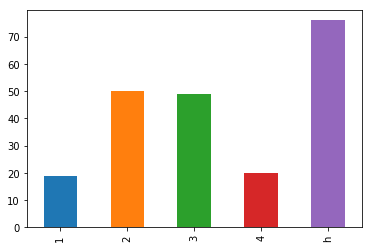

In [10]:
from itertools import groupby

freqs = pd.Series({key:len(list(group)) for key, group in groupby(np.sort(y_stages))}) 

print(freqs)

freqs.plot(kind='bar')

Healthy samples eliminated in stage study

In [11]:
X_pathways_without_h, y_stages_without_h = list(zip(*filter(lambda x: x[1] !='h', zip(X_pathways, y_stages))))

In [12]:
from services import feature_importance_anova

df_stage = feature_importance_anova(X_pathways_without_h, y_stages_without_h)
df_stage

labels,1,2,3,4,F,pval
Folate metabolism_dif,15,-18,-14,-3.5,3.6,0.24
Fatty acid synthesis_dif,8.4,-1.5,0.35,16,4.1,0.24
Biotin metabolism_dif,-2.3e+02,80,8.4,-1.1e+02,3.7,0.24
Lysine metabolism_dif,-76,-10,1.1e+02,96,4.2,0.24
"Glycine, serine, alanine and threonine metabolism_dif",4.9,-78,-92,-46,3.3,0.31
Butanoate metabolism_dif,-2e+02,-2.6e+02,-2.6e+02,-2.1e+02,3,0.33
Urea cycle_dif,14,-28,-33,-45,3.1,0.33
beta-Alanine metabolism_dif,-59,-11,24,-52,2.6,0.37
Purine synthesis_dif,-1.1e+02,-2.3e+02,-1.8e+02,-2.6e+02,2.7,0.37
Glycosphingolipid metabolism_dif,1.2,-0.92,-1.2,-1.3,2.7,0.37


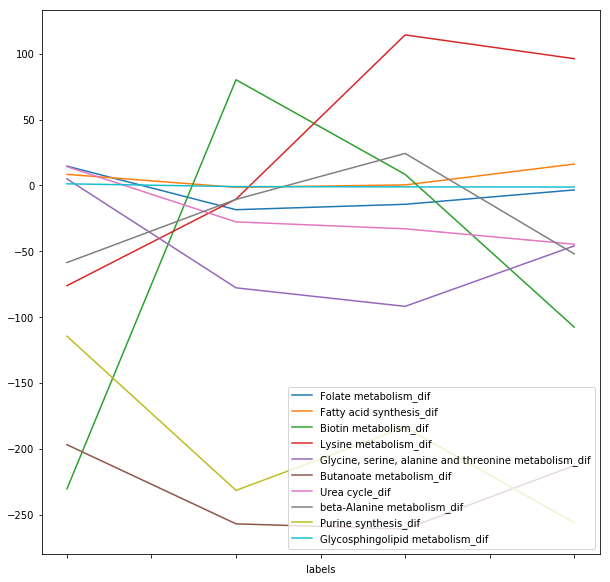

In [13]:
df_stage[:10][['1','2','3','4']].T.plot(kind='line', figsize=(10, 10))

## Pathifier Results

Loads patifier results which obtain according to our metabolite pathway mapping

In [14]:
from services import DataReader

X_pathifier, y = DataReader().read_analyze_solution('bc_pathifier_analysis#k=0')

Pathway by their pathier scores

In [15]:
pd.DataFrame.from_records(X_pathifier).mean().sort_values(ascending=False)

N-glycan degradation                                 0.87
Keratan sulfate degradation                          0.87
Valine, leucine, and isoleucine metabolism           0.85
Urea cycle                                            0.8
Citric acid cycle                                    0.75
Alanine and aspartate metabolism                      0.7
Vitamin C metabolism                                 0.69
Arginine and Proline Metabolism                      0.62
Lysine metabolism                                     0.6
Glyoxylate and dicarboxylate metabolism              0.59
Methionine and cysteine metabolism                   0.43
Glycerophospholipid metabolism                       0.34
Tryptophan metabolism                                0.31
Tyrosine metabolism                                  0.27
Sphingolipid metabolism                              0.26
Eicosanoid metabolism                                0.23
Miscellaneous                                        0.19
Pentose phosph

In [16]:
from services import feature_importance_anova

df_pathifier = feature_importance_anova(X_pathifier, y)
df_pathifier

labels,bc,h,F,pval
Sphingolipid metabolism,0.35,0.1,1.9e+02,1.8e-29
Glycerophospholipid metabolism,0.41,0.23,1.8e+02,6.7e-29
Methionine and cysteine metabolism,0.5,0.32,89,4.9e-17
Eicosanoid metabolism,0.27,0.16,70,3.9e-14
Pentose phosphate pathway,0.22,0.13,65,2.8e-13
Arginine and Proline Metabolism,0.64,0.58,28,1.1e-06
Alanine and aspartate metabolism,0.72,0.66,26,2e-06
Glyoxylate and dicarboxylate metabolism,0.61,0.54,26,2e-06
Urea cycle,0.82,0.76,19,5.3e-05
Pyruvate metabolism,0.16,0.1,18,5.8e-05


## Paradigm Results

Loads precompute paradigm results and convert them into pathway level

In [45]:
from preprocessing import PathwayFvaScaler

X_paradigm, y = DataReader().read_analyze_solution('paradigm_results#k=0', gz=False)
X_paradigm_r = [{'%s_par' % k: v for k, v in d.items()} for d in X_paradigm]
X_paradigm = PathwayFvaScaler().fit_transform(X_paradigm_r, y)

Probability values of pathways by paradigm

In [28]:
pd.DataFrame.from_records(X_paradigm).mean().sort_values(ascending=False)

Taurine and hypotaurine metabolism_par                    0.092
C5-branched dibasic acid metabolism_par                   0.036
Biotin metabolism_par                                     0.035
Glyoxylate and dicarboxylate metabolism_par               0.021
Pyrimidine catabolism_par                                 0.011
Methionine and cysteine metabolism_par                   0.0073
Vitamin C metabolism_par                                 0.0053
beta-Alanine metabolism_par                              0.0023
Histidine metabolism_par                                 0.0019
Vitamin D metabolism_par                                0.00059
Phosphatidylinositol phosphate metabolism_par           0.00058
Steroid metabolism_par                                  0.00043
Nucleotide interconversion_par                          0.00035
Bile acid synthesis_par                                 -0.0005
Aminosugar metabolism_par                               -0.0011
N-glycan synthesis_par                  

Elimation of low variance feature before ANOVA

In [18]:
from services import feature_importance_anova

df_paradigm = feature_importance_anova(X_paradigm, y)
df_paradigm

labels,bc,h,F,pval
Taurine and hypotaurine metabolism_par,0.18,-0.068,1.3e+02,8.3e-23
Biotin metabolism_par,0.057,-0.0044,1e+02,1.6e-18
C5-branched dibasic acid metabolism_par,0.074,-0.033,73,3.2e-14
Pentose phosphate pathway_par,-0.17,-0.058,66,3.5e-13
Methionine and cysteine metabolism_par,0.024,-0.023,42,4.3e-09
Pyrimidine catabolism_par,0.023,-0.01,39,1.4e-08
Alanine and aspartate metabolism_par,0.0012,-0.085,25,6.1e-06
Alkaloid synthesis_par,-0.05,-0.015,23,1.4e-05
Glyoxylate and dicarboxylate metabolism_par,0.04,-0.014,22,1.6e-05
"Transport, endoplasmic reticular_par",-0.062,-0.043,20,4e-05


## Measured Metabolite Count For Each Pathway

Load metobolite measurements and map naming

In [19]:
from models import metabolite_extantions
from services import NamingService

X_metabolites = NamingService('recon').to(DataReader().read_data('BC')[0])

Network loaded

In [20]:
recon = DataReader().read_network_model()

metabolite names

In [21]:
from functools import reduce

metabolite_names = set(reduce(list.__add__, [list(m.keys()) for m in X_metabolites]))

In [22]:
from collections import defaultdict

pathways = defaultdict(int)
for m in metabolite_names:
    for p in recon.metabolites.get_by_id(m).connected_subsystems():
        if p:
            pathways[p] += 1

pd.Series(pathways)

Alanine and aspartate metabolism                      7
Alkaloid synthesis                                    1
Aminosugar metabolism                                 1
Arachidonic acid metabolism                           1
Arginine and Proline Metabolism                       8
Bile acid synthesis                                   1
Biotin metabolism                                     1
C5-branched dibasic acid metabolism                   1
Cholesterol metabolism                                2
Citric acid cycle                                     5
D-alanine metabolism                                  1
Eicosanoid metabolism                                 4
Exchange/demand reaction                             26
Fatty acid oxidation                                 15
Fructose and mannose metabolism                       2
Galactose metabolism                                  2
Glutamate metabolism                                  1
Glycerophospholipid metabolism                  

## Classification 

### Metabolitics

Pathway diff-scores given as input to LogisticRegression with given parameters

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
            ('dy', DynamicPreprocessing([
                'flux-diff', 
                'feature-selection', 
                'pathway-scoring', 
                'transport-elimination'])),
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.3e-6, random_state=43))
        ])

10-fold test runned with f1 score calculation

In [24]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GroupKFold

kf = StratifiedKFold(n_splits=10, random_state=43)

scores = cross_val_score(pipe, X, y, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores)
print('mean: %s' % scores.mean().round(3))
print('std: %s' % scores.std().round(3))

kfold test: [ 0.90909091  1.          0.86363636  1.          0.90909091  0.95454545
  1.          1.          0.8         0.95      ]
mean: 0.939
std: 0.065


### Pathifier

In [43]:
pipe_pathifier = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(random_state=43))
        ])

scores_pathifier = cross_val_score(pipe_pathifier, X_pathifier, y, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores_pathifier)
print('mean: %s' % scores_pathifier.mean().round(3))
print('std: %s' % scores_pathifier.std().round(3))

kfold test: [ 0.95454545  1.          0.86363636  1.          0.86363636  0.90909091
  1.          1.          0.85        0.95      ]
mean: 0.939
std: 0.06


### Paradigm

In [46]:
pipe_paradigm = Pipeline([
            ('vect', DictVectorizer(sparse=False)),
            ('pca', PCA()),
            ('clf', LogisticRegression(C=0.01, random_state=43))
        ])

scores_paradigm = cross_val_score(pipe_paradigm, X_paradigm_r, y, cv=kf, n_jobs=-1, scoring='f1_micro')
print('kfold test: %s' % scores_paradigm)
print('mean: %s' % scores_paradigm.mean().round(3))
print('std: %s' % scores_paradigm.std().round(3))

kfold test: [ 0.95454545  1.          0.95454545  0.95454545  0.86363636  0.86363636
  0.95238095  1.          0.9         0.95      ]
mean: 0.939
std: 0.046
